In [3]:
from pysheds.grid import Grid
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from pathlib import Path
import matplotlib.colors as colors

In [4]:
DEMpath= 'DEM/Copernicus_DSM_10_S19_00_E047_00_DEM.tif'

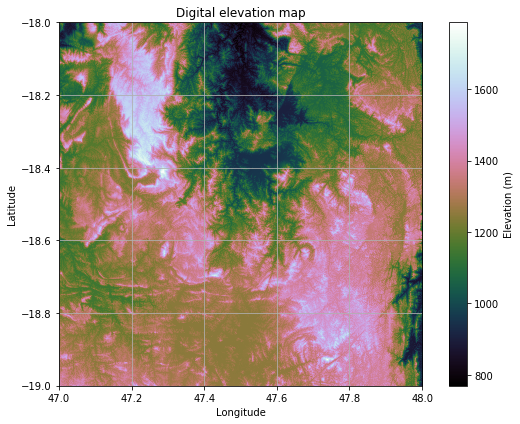

In [5]:
grid= Grid.from_raster(DEMpath, data_name='dem')
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(grid.dem, extent=grid.extent, cmap='cubehelix', zorder=1)
plt.colorbar(label='Elevation (m)')
plt.grid(zorder=0)
plt.title('Digital elevation map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
# plt.savefig('conditioned_dem.png', bbox_inches='tight')

# HAND

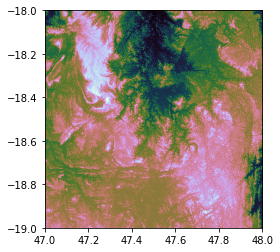

In [6]:
# DEM
grid = Grid.from_raster(DEMpath, data_name='dem')
grid.view('dem')
plt.imshow(grid.dem, extent=grid.extent, cmap='cubehelix', zorder=1)

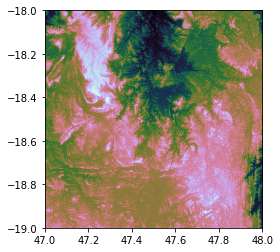

In [7]:
# Fill depressions
grid.fill_depressions(data='dem', out_name='flooded_dem')
plt.imshow(grid.flooded_dem, extent=grid.extent, cmap='cubehelix', zorder=1)

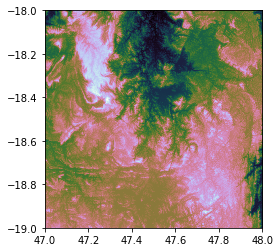

In [8]:
# Resolve flats
grid.resolve_flats(data='flooded_dem', out_name='inflated_dem')
plt.imshow(grid.inflated_dem, extent=grid.extent, cmap='cubehelix', zorder=1)

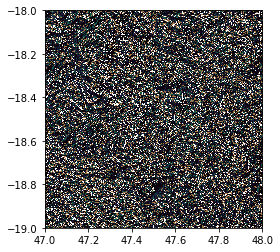

In [9]:
grid.flowdir(data='inflated_dem', out_name='dir')
plt.imshow(grid.dir, extent=grid.extent, cmap='cubehelix', zorder=1)
# grid.to_raster('dir', 'flowdir.tif')

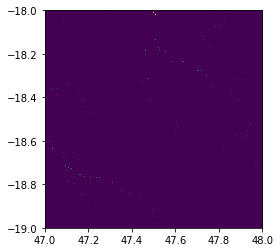

In [10]:
grid.accumulation(data='dir', out_name='acc')
plt.imshow(grid.acc,extent=grid.extent,)
#grid.to_raster('acc', 'Output/accumulation.tif',dtype=np.int32)

Text(0.5,1,'Height above nearest drainage')

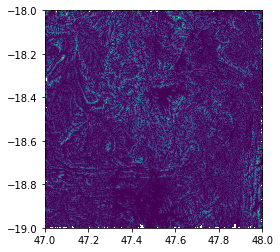

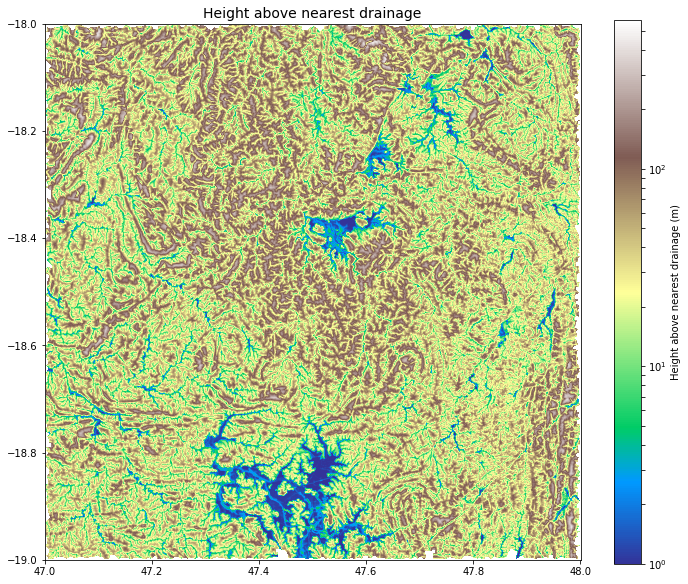

In [11]:
hand = grid.compute_hand('dir', 'inflated_dem', grid.acc > 450, inplace=False )
plt.imshow(hand,extent=grid.extent)
fig, ax = plt.subplots(figsize=(12,10))
plt.imshow(hand + 1, zorder=1,extent=grid.extent,cmap='terrain', interpolation='bilinear',
           norm=colors.LogNorm(vmin=1, vmax=np.nanmax(hand)))
plt.colorbar(label='Height above nearest drainage (m)')
plt.title('Height above nearest drainage', size=14)

In [14]:
grid.to_raster(hand, 'Deliverables/antananarivo_hand_seasonal_20210625_20210625_Band1.tif')

/home/jovyan/.conda/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


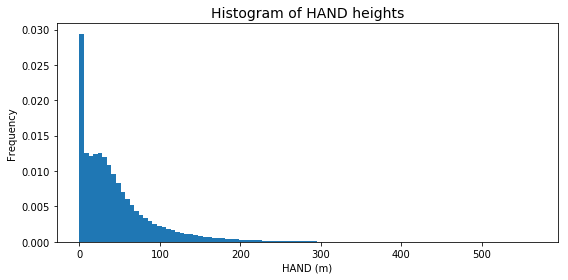

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
h = plt.hist(hand[~np.isnan(hand)], bins=100, normed=True)
plt.title('Histogram of HAND heights', size=14)
plt.ylabel('Frequency')
plt.xlabel('HAND (m)')
plt.tight_layout()

In [12]:
_, bins = np.histogram(hand[~np.isnan(hand) & (hand < 50)], bins=5)

In [13]:
classes = np.digitize(hand, bins)

Text(0.5,1,'HAND Class')

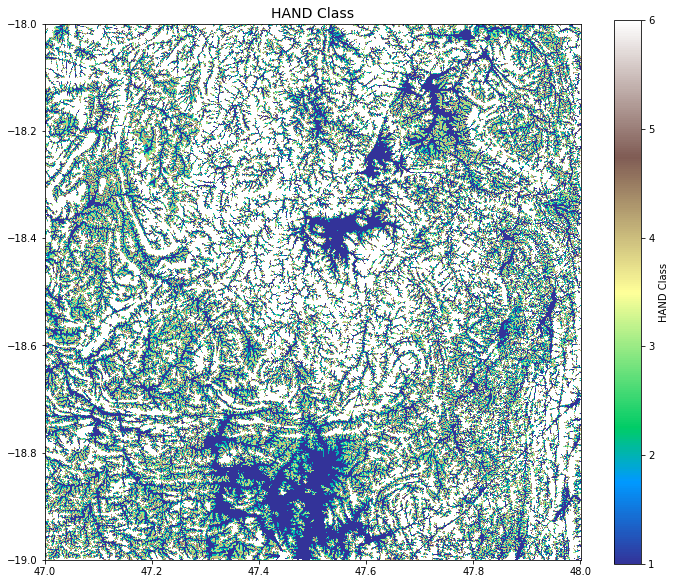

In [14]:
fig, ax = plt.subplots(figsize=(12,10))
plt.imshow(classes, zorder=1, cmap='terrain',extent=grid.extent,)
plt.colorbar(label='HAND Class')
plt.title('HAND Class', size=14)